<a href="https://colab.research.google.com/github/KaiWoessner/NFLDataAnalysis/blob/main/GameStatsGraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install nfl_data_py

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.ticker import FuncFormatter
import numpy as np
from PIL import Image
import nfl_data_py as nfl
#import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from google.colab import drive

drive.mount('/content/drive')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.3 MB/s eta 0:00:00
  Created wheel for nfl_data_py: filename=nfl_data_py-0.3.1-py3-none-any.whl size=13187 sha256=ac5051f8b220eab24cdd93d74a688dccf58942bfd3628469d91403d9f1e1d921
  Stored in directory: /root/.cache/pip/wheels/ca/2e/d2/4def312ac7c070e1c0002e91ecc6923481a86c3ebd5b2c5413
Successfully built nfl_data_py
Mounted at /content/drive


In [3]:
!pip install nfl_data_py

In [4]:
import nfl_data_py as nfl

In [5]:
#Data import and cleaning
years = [2022]

df2022 = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
df2022.reset_index(drop=True, inplace=True)
df2022 = df2022.loc[df2022.season_type=='REG']
#df2022 = df2022.loc[((df2022['play_type'].isin(['no_play', 'pass', 'run'])) | (df2022['play_type'] == '')) & (df2022['epa'].notna())]
df2022.loc[df2022['pass']==1, 'play_type'] = 'pass'
df2022.loc[df2022["rush"]==1, 'play_type'] = 'run'

df2022.reset_index(drop=True, inplace=True)
df2022.info()

2022 done.
Downcasting floats.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47841 entries, 0 to 47840
Columns: 384 entries, play_id to n_defense
dtypes: float32(202), int32(8), int64(1), object(173)
memory usage: 101.8+ MB


In [6]:
#Data import and cleaning
years = [2023]

df = nfl.import_pbp_data(years, downcast=True, cache=False, alt_path=None)
df.reset_index(drop=True, inplace=True)
df = df.loc[df.season_type=='REG']
#df = df.loc[(df.play_type.isin(['no_play','pass','run', '']))]
df.loc[df['pass']==1, 'play_type'] = 'pass'
df.loc[df["rush"]==1, 'play_type'] = 'run'

df.reset_index(drop=True, inplace=True)

2023 done.
Downcasting floats.


In [7]:
image_paths = {
    'SF': '/content/drive/My Drive/NFL_Logos/49ers.png',
    'CHI': '/content/drive/My Drive/NFL_Logos/Bears.png',
    'CIN': '/content/drive/My Drive/NFL_Logos/Bengals.png',
    'BUF': '/content/drive/My Drive/NFL_Logos/Bills.png',
    'DEN': '/content/drive/My Drive/NFL_Logos/Broncos.png',
    'CLE': '/content/drive/My Drive/NFL_Logos/Browns.png',
    'TB': '/content/drive/My Drive/NFL_Logos/Buccaneers.png',
    'ARI': '/content/drive/My Drive/NFL_Logos/Cardinals.png',
    'LAC': '/content/drive/My Drive/NFL_Logos/Chargers.png',
    'KC': '/content/drive/My Drive/NFL_Logos/Chiefs.png',
    'IND': '/content/drive/My Drive/NFL_Logos/Colts.png',
    'WAS': '/content/drive/My Drive/NFL_Logos/Commanders.png',
    'DAL': '/content/drive/My Drive/NFL_Logos/Cowboys.png',
    'MIA': '/content/drive/My Drive/NFL_Logos/Dolphins.png',
    'PHI': '/content/drive/My Drive/NFL_Logos/Eagles.png',
    'ATL': '/content/drive/My Drive/NFL_Logos/Falcons.png',
    'NYG': '/content/drive/My Drive/NFL_Logos/Giants.png',
    'JAX': '/content/drive/My Drive/NFL_Logos/Jaguars.png',
    'NYJ': '/content/drive/My Drive/NFL_Logos/Jets.png',
    'DET': '/content/drive/My Drive/NFL_Logos/Lions.png',
    'GB': '/content/drive/My Drive/NFL_Logos/Packers.png',
    'CAR': '/content/drive/My Drive/NFL_Logos/Panthers.png',
    'NE': '/content/drive/My Drive/NFL_Logos/Patriots.png',
    'LV': '/content/drive/My Drive/NFL_Logos/Raiders.png',
    'LA': '/content/drive/My Drive/NFL_Logos/Rams.png',
    'BAL': '/content/drive/My Drive/NFL_Logos/Ravens.png',
    'NO': '/content/drive/My Drive/NFL_Logos/Saints.png',
    'SEA': '/content/drive/My Drive/NFL_Logos/Seahawks.png',
    'PIT': '/content/drive/My Drive/NFL_Logos/Steelers.png',
    'HOU': '/content/drive/My Drive/NFL_Logos/Texans.png',
    'TEN': '/content/drive/My Drive/NFL_Logos/Titans.png',
    'MIN': '/content/drive/My Drive/NFL_Logos/Vikings.png',
}

In [8]:
df.head()

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,defense_players,n_offense,n_defense
0,1.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,,0,0
1,39.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,None,None,NaN,None,NaN,48000;52641;54721;56098;53639;53448;55912;4510...,00-0035150;00-0037330;00-0036896;00-0033251;00...,00-0036403;00-0038635;00-0036614;00-0039149;00...,11,11
2,55.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,SHOTGUN,"1 RB, 2 TE, 2 WR",7.0,"3 DL, 4 LB, 4 DB",NaN,49410;54563;41475;52516;47812;46629;53445;4134...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0036896;00...,11,11
3,77.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",4.0,49410;54563;41475;52516;47812;46629;53445;4134...,00-0037746;00-0031095;00-0036334;00-0034445;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11,11
4,102.0,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,I_FORM,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 4 LB, 5 DB",NaN,49410;41475;52516;47812;53445;46629;41349;5348...,00-0031095;00-0036334;00-0034445;00-0031260;00...,00-0035705;00-0035636;00-0036933;00-0034375;00...,11,11


In [9]:
pen_team = df["penalty_team"]
df1 = pd.DataFrame(pen_team)

In [10]:
df1 = df1.dropna()

In [11]:
df1.head()

,penalty_team
10,WAS
17,WAS
18,ARI
21,ARI
23,ARI


In [12]:
team = pen_team.value_counts()

In [13]:
pen = team.values
tm = team.index

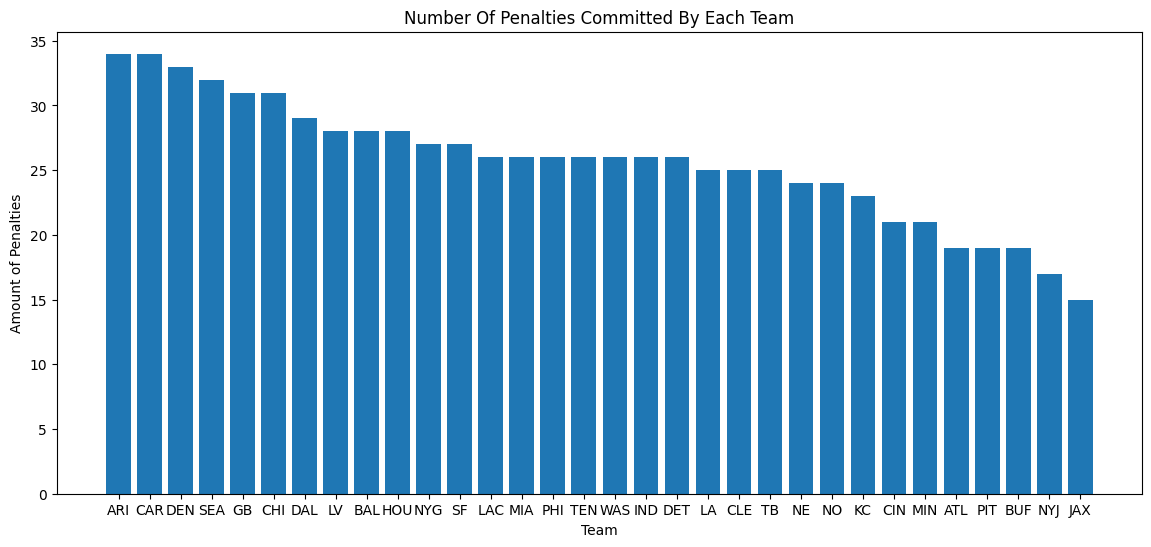

In [14]:
plt.figure(figsize=(14, 6))
plt.bar(tm, pen, width = .8)

plt.xlabel('Team')
plt.ylabel('Amount of Penalties')
plt.title('Number Of Penalties Committed By Each Team')

plt.show()

In [15]:
df3 = df.groupby('penalty_team')['down'].value_counts().reset_index(name='count')

In [16]:
stacked_df = df3.pivot(index='penalty_team', columns='down', values='count').fillna(0)

In [17]:
# Calculate the total count for each 'penalty_team'
team_totals = stacked_df.groupby('penalty_team').sum().sum(axis=1)

# Sort the DataFrame by the total count in descending order
sorted_df = stacked_df.groupby('penalty_team').sum().loc[team_totals.sort_values(ascending=False).index]

In [ ]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [ ]:
team_base_color = [
    (151, 35, 63), (167, 25, 48), (36, 23, 115), (0, 51, 141), (0, 133, 202), (0, 20, 63), (251, 79, 20), (251, 79, 20),
    (176, 183, 188), (255, 128, 0), (4, 110, 180), (36, 66, 60), (201, 36, 63), (0, 61, 121), (19, 102, 119), (202, 36, 48),
    (0, 33, 71), (32, 114, 186), (196, 201, 204), (0, 145, 160), (79, 46, 132), (10, 35, 66), (160, 138, 88), (25, 46, 108),
    (32, 55, 49), (1, 74, 83), (255, 194, 14), (122, 193, 66), (201, 36, 63), (212, 9, 9), (64, 149, 209), (255, 194, 15)
]

lighter_colors = []
darker_colors = []
normal_colors = []
for color in team_base_color:

    r, g, b = color
    # Lighten the color by adding to each component
    r_lighter = min(255, r + 70)  # Increase the R component
    g_lighter = min(255, g + 70)  # Increase the G component
    b_lighter = min(255, b + 70)  # Increase the B component

    # Darken the color by subtracting from each component
    r_darker = max(0, r - 70)  # Decrease the R component
    g_darker = max(0, g - 70)  # Decrease the G component
    b_darker = max(0, b - 70)  # Decrease the B component

    # Append lighter and darker colors in RGB form to lists
    lighter_colors.append((r_lighter/255.0, g_lighter/255.00, b_lighter/255.0, 1.0))
    normal_colors.append((r/255.0, g/255.0, b/255.0, 1.0))
    darker_colors.append((r_darker/255.0, g_darker/255.0, b_darker/255.0, 1.0))

RGBA_colors = [lighter_colors, normal_colors, darker_colors]
print(RGBA_colors)

In [ ]:
colors = ['orange', 'green', 'blue', 'red']

ax = sorted_df.plot(kind='bar', stacked=True, figsize=(12, 6), width=0.85, color=colors, edgecolor='black', linewidth=0.7, zorder=3)

# Add labels
plt.xlabel('Teams')
plt.ylabel('Penalties')
plt.title('Team Penalties by Down')

# Add images
for i, team_name in enumerate(sorted_df.index):
  img_path = image_paths.get(team_name)
  img = mpimg.imread(img_path)
  ax.imshow(img, extent=[i - 0.5, i + 0.5, -2.4, -0.9], aspect='auto', alpha=1, zorder=5)

# Add legend
legend_labels = ['1st Down', '2nd Down', '3rd Down', '4th Down ']
plt.legend(legend_labels, title = "Downs")

ax.set_ylim([-4, (team_totals).values.max() + 3])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_visible(False)
ax.grid(zorder=0)

# Show the graph
plt.tight_layout()
plt.show()

In [ ]:
down1 = sorted_df.values[:, 0]
down2 = sorted_df.values[:, 1]
down3 = sorted_df.values[:, 2]
down4 = sorted_df.values[:, 3]

print(sorted_df.index)


In [ ]:
image_paths = {
    'SF': '/content/drive/My Drive/NFL_Logos/49ers.png',
    'CHI': '/content/drive/My Drive/NFL_Logos/Bears.png',
    'CIN': '/content/drive/My Drive/NFL_Logos/Bengals.png',
    'BUF': '/content/drive/My Drive/NFL_Logos/Bills.png',
    'DEN': '/content/drive/My Drive/NFL_Logos/Broncos.png',
    'CLE': '/content/drive/My Drive/NFL_Logos/Browns.png',
    'TB': '/content/drive/My Drive/NFL_Logos/Buccaneers.png',
    'ARI': '/content/drive/My Drive/NFL_Logos/Cardinals.png',
    'LAC': '/content/drive/My Drive/NFL_Logos/Chargers.png',
    'KC': '/content/drive/My Drive/NFL_Logos/Chiefs.png',
    'IND': '/content/drive/My Drive/NFL_Logos/Colts.png',
    'WAS': '/content/drive/My Drive/NFL_Logos/Commanders.png',
    'DAL': '/content/drive/My Drive/NFL_Logos/Cowboys.png',
    'MIA': '/content/drive/My Drive/NFL_Logos/Dolphins.png',
    'PHI': '/content/drive/My Drive/NFL_Logos/Eagles.png',
    'ATL': '/content/drive/My Drive/NFL_Logos/Falcons.png',
    'NYG': '/content/drive/My Drive/NFL_Logos/Giants.png',
    'JAX': '/content/drive/My Drive/NFL_Logos/Jaguars.png',
    'NYJ': '/content/drive/My Drive/NFL_Logos/Jets.png',
    'DET': '/content/drive/My Drive/NFL_Logos/Lions.png',
    'GB': '/content/drive/My Drive/NFL_Logos/Packers.png',
    'CAR': '/content/drive/My Drive/NFL_Logos/Panthers.png',
    'NE': '/content/drive/My Drive/NFL_Logos/Patriots.png',
    'LV': '/content/drive/My Drive/NFL_Logos/Raiders.png',
    'LA': '/content/drive/My Drive/NFL_Logos/Rams.png',
    'BAL': '/content/drive/My Drive/NFL_Logos/Ravens.png',
    'NO': '/content/drive/My Drive/NFL_Logos/Saints.png',
    'SEA': '/content/drive/My Drive/NFL_Logos/Seahawks.png',
    'PIT': '/content/drive/My Drive/NFL_Logos/Steelers.png',
    'HOU': '/content/drive/My Drive/NFL_Logos/Texans.png',
    'TEN': '/content/drive/My Drive/NFL_Logos/Titans.png',
    'MIN': '/content/drive/My Drive/NFL_Logos/Vikings.png',
}

df3 = df.groupby('penalty_team')['down'].value_counts().reset_index(name='count')

# Calculate the total count for each 'penalty_team'
team_totals = stacked_df.groupby('penalty_team').sum().sum(axis=1)

# Sort the DataFrame by the total count in descending order
sorted_df = stacked_df.groupby('penalty_team').sum().loc[team_totals.sort_values(ascending=False).index]
sorted_df.head()

In [ ]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

down1 = sorted_df.values[:, 0]
down2 = sorted_df.values[:, 1]
down3 = sorted_df.values[:, 2]
down4 = sorted_df.values[:, 3]

# Color
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

team_colors = [teamcolor.get(team) for team in sorted_df.index]

fig, ax = plt.subplots(figsize = (14,5))

index = np.arange(len(sorted_df.index))

lwidth = 1.3

ax.bar(index, down1, color=team_colors, edgecolor='k', linewidth=lwidth, zorder = 4)
ax.bar(index, down2, bottom=down1, color=team_colors,edgecolor='k', linewidth=lwidth,zorder = 4)
ax.bar(index, down3, bottom=[d1 + d2 for d1, d2 in zip(down1, down2)], color=team_colors, edgecolor='k', linewidth=lwidth,zorder = 4)
ax.bar(index, down4, bottom=[d1 + d2 + d3 for d1, d2, d3 in zip(down1, down2, down3)], color=team_colors, edgecolor='k', linewidth=lwidth,zorder = 4)

for i in range(len(sorted_df.index)):
    team = sorted_df.index[i]

    # Calculate the total height of the bar for this team
    total_height = down1[i] + down2[i] + down3[i] + down4[i]

    # Add labels for each segment (1st, 2nd, 3rd, 4th down)
    ax.text(i, down1[i] / 2, str(int(down1[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] / 2), str(int(down2[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)
    ax.text(i, (down1[i] + down2[i] + down3[i] / 2), str(int(down3[i])), ha='center', va='center', color='white', fontsize=10, zorder = 5)

for i in range(len(sorted_df.index)):
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.5,i + 0.50, -3.4 ,-1], aspect='auto', zorder=3)


# Add labels
ax.set_ylabel('Amount of Penalties')
ax.set_title('Penalties by Teams in 2023 (Weeks 1-4)')

# Add a main title
ax.set_title('Penalties by Teams in 2023 (Weeks 1-4)', fontsize=16)

# Add a subtitle
subtitle = 'Penalties are only counted if they were accepted'
plt.text(0.5, 0.97, subtitle, fontsize=10, ha='center', transform=ax.transAxes)

plt.text(0.863, 0.925, "Top = 4th Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.927, 0.875, "Upper Middle = 3rd Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.93, 0.825, "Lower Middle = 2nd Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.888, 0.775, "Bottom = 1st Down", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, (team_totals).values.max() + 4])
plt.xlim([-1, 33])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(range(0, 32, 1))

ax.grid(zorder=0)
ax.xaxis.set_visible(False)


# Show the graph
plt.tight_layout()
plt.show()

In [ ]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [ ]:
pass_df = df[df['play_type'] == "pass"]
pass_df.head()

In [ ]:
filt = pass_df.groupby('posteam')['qb_epa'].sum()
plays = pass_df['posteam'].value_counts()

In [ ]:
plays = plays.sort_index()
plays.head()

In [ ]:
filt = filt.sort_index()
filt.head()

In [ ]:
qb_epa_per_play = filt / plays
print(qb_epa_per_play)

In [ ]:
fin = df[df["desc"] == "END GAME"]

In [ ]:
home_pts = fin.groupby('home_team')['total_home_score'].sum()

away_pts = fin.groupby('away_team')['total_away_score'].sum()


total_pts = home_pts + away_pts
#total_pts.head()

tot_pt = total_pts.values
team = total_pts.index
#print(tot_pt)
#print(team)

total_pts.head()

In [ ]:
coefficients = np.polyfit(qb_epa_per_play, tot_pt, 1)
print(coefficients[1])
print(coefficients[0])

In [ ]:
plt.scatter(qb_epa_per_play, tot_pt, marker='.', color='black')

for i, team in enumerate(plays.index):
    plt.annotate(team, (qb_epa_per_play[i], tot_pt[i]))

trend_line = coefficients[0] * np.array(qb_epa_per_play) + coefficients[1]

plt.plot(qb_epa_per_play, trend_line, color='red', label='Trend Line')


plt.xlabel('QB EPA/PLAY')
plt.ylabel('Total Points')
plt.title('QB Play to Points')
plt.grid(True)

plt.show()

In [ ]:
logo_images = []
for team in plays.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [ ]:
from matplotlib import axes
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Define the size for the images
mult = 0.5
image_width = 0.05 * mult
image_height = 2 * mult

# Scatter plot with markers replaced by logos
for i in range(len(qb_epa_per_play)):
    x, y, team = qb_epa_per_play[i], tot_pt[i], plays.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[x - image_width / 2, x + 0.03 + image_width / 2, y - image_height / 2, y + 3.4 + image_height / 2], aspect='auto', zorder=3)

# Trendline
trend_line = coefficients[0] * np.array(qb_epa_per_play) + coefficients[1]
plt.plot(qb_epa_per_play, trend_line, color='red', label='Trend Line')


plt.xlabel('QB EPA/Play')
plt.ylabel('Team Points')
plt.title('QB Play vs Team Points in 2023 (Weeks 1-4)')
plt.grid(True)

plt.ylim(40,160)
plt.xlim(-0.3,0.5)

plt.show()

QB BIAS

In [ ]:
logo_images = []

for team in sorted_df.index:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

In [ ]:
pass_filt = df[df['pass_location'].isin(["middle", "right", "left"])]

pass_loc = pass_filt[['posteam', 'pass_location']]
pass_loc.head()

In [ ]:
total_pass = pass_loc.groupby('posteam').value_counts()
total_pass.head()

In [ ]:
pass_group = pass_loc.groupby('posteam')['pass_location'].value_counts().reset_index(name="count")

pass_group.head(96)

In [ ]:
total_pass = pass_group.groupby("posteam")["count"].sum().reset_index()

total_pass = total_pass.loc[np.repeat(total_pass.index, 3)].reset_index(drop=True)

tot_pass = pd.DataFrame(total_pass)
tot_pass.head()

In [ ]:
pass_group["percent_loc"] = pass_group["count"] / tot_pass["count"] * 100

In [ ]:
# Pivot the DataFrame to separate pass_location into columns
piv_pass_group = pass_group.pivot(index='posteam', columns='pass_location', values='percent_loc')

piv_pass_group.head()

In [ ]:
# Get the list of teams and their corresponding index
teams = piv_pass_group.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(10, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_pass_group[location]
    ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=RGBA_colors[i], edgecolor='black', linewidth=1, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -3.4 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Percentage of Pass Locations by Teams in 2023 (Weeks 1-4)')
ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.text(0.975, 0.96, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.98, 0.91, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.985, 0.86, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 70, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#2022 Bias Data
pass_filt2022 = df2022[df2022['pass_location'].isin(["middle", "right", "left"])]

pass_loc2022 = pass_filt2022[['posteam', 'pass_location']]

total_pass2022 = pass_loc2022.groupby('posteam').value_counts()

pass_group2022 = pass_loc2022.groupby('posteam')['pass_location'].value_counts().reset_index(name="count")

total_pass2022 = pass_group2022.groupby("posteam")["count"].sum().reset_index()

total_pass2022 = total_pass2022.loc[np.repeat(total_pass2022.index, 3)].reset_index(drop=True)

tot_pass2022 = pd.DataFrame(total_pass2022)

pass_group2022["percent_loc"] = pass_group2022["count"] / tot_pass2022["count"] * 100

# Pivot the DataFrame to separate pass_location into columns
piv_pass_group2022 = pass_group2022.pivot(index='posteam', columns='pass_location', values='percent_loc')

piv_pass_group2022.head()

In [ ]:
# Get the list of teams and their corresponding index
teams = piv_pass_group2022.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(14, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_pass_group2022[location]
    ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=RGBA_colors[i], edgecolor='black', linewidth=1, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -3.4 ,-1], aspect='auto', zorder=3)


ax.set_ylabel('Percentage of Total Passes (%)')
ax.set_title('Percentage of Pass Locations by Teams in 2022')
ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.text(0.96, 0.92, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.965, 0.87, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.968, 0.82, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

plt.ylim([-4.9, 60])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(0, 70, 5))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
#plt.tight_layout()
plt.show()

In [ ]:
pass_group["percent_diff"] = pass_group["percent_loc"] - pass_group2022["percent_loc"]

# Pivot the DataFrame to separate pass_location into columns
piv_passdif = pass_group.pivot(index='posteam', columns='pass_location', values='percent_diff')

piv_passdif.head()

In [ ]:
# Get the list of teams and their corresponding index
teams = piv_passdif.index
index = range(len(teams))

logo_images = []

for team in teams:
    logo_img = Image.open(f'/content/drive/My Drive/NFL_AbrevLogos/{team}.png')  # Adjust the path to your logo images
    logo_images.append(logo_img)

# Plot the grouped bar chart
width = 0.25  # Width of each bar
fig, ax = plt.subplots(figsize=(14, 6))

for i, location in enumerate(['left', 'middle', 'right']):
    loc_values = piv_passdif[location]
    ax.bar([pos + i * width for pos in index], loc_values, width=width, label=location, color=RGBA_colors[i], edgecolor='black', linewidth=2, zorder = 5)


for i in index:
    team = sorted_df.index[i]

    # Overlay the logo at each data point
    logo_img = logo_images[i]
    plt.imshow(logo_img, extent=[i-0.3,i + 0.70, -0.8 ,0.8], aspect='auto', zorder=7)


ax.set_ylabel('Percentage Difference (%)')

# Add a main title
ax.set_title('Percentage Difference of Pass Locations from 2022 to 2023', fontsize=16)

# Add a subtitle
subtitle = 'Positive values mean that pass concentration increased. Negative values mean that pass concentration decreased'
plt.text(0.5, 0.98, subtitle, fontsize=8, ha='center', transform=ax.transAxes)

plt.text(0.96, 0.92, "Lighter Color = Pass to Left", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.965, 0.87, "Base Color = Pass to Middle", fontsize=12, ha='right', va='top', transform=ax.transAxes)
plt.text(0.968, 0.82, "Darker Color = Pass to Right", fontsize=12, ha='right', va='top', transform=ax.transAxes)

ax.set_xticks([pos + width for pos in index])
ax.set_xticklabels(teams)

plt.ylim([-15, 15])
plt.xlim([-0.5, 32])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks(range(-14, 16, 2))


ax.grid(zorder=0)
ax.xaxis.set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
qb2023 = nfl.import_weekly_data([2023])

qb2023 = qb2023[qb2023["position"] == "QB"]
qb2023.info()

In [ ]:
qb2023 = qb2023[["player_name", "recent_team", "attempts", "passing_yards", "passing_air_yards", "passing_yards_after_catch", "sacks", "passing_epa"]]
qb2023["passing_plays"] = qb2023["attempts"] + qb2023["sacks"]

qb2023.head(15)

In [ ]:
# Group and aggregate the data
group_qb2023 = qb2023.groupby("player_name").agg({
    "passing_plays": "sum",
    "attempts": "sum",
    "passing_epa": "sum",
    "passing_air_yards": "sum",
    "passing_yards": "sum",
    "passing_yards_after_catch": "sum",
    "recent_team": "first"  # Include the team information
}).reset_index()

group_qb2023["percent_yac"] = group_qb2023["passing_yards_after_catch"] / group_qb2023["passing_yards"] * 100
group_qb2023["passing_epa_per_play"] = group_qb2023["passing_epa"] / group_qb2023["passing_plays"]
group_qb2023["adot"] = group_qb2023["passing_air_yards"] / group_qb2023["attempts"]


group_qb2023 = group_qb2023[group_qb2023["passing_plays"] > 50].reset_index(drop=True)

group_qb2023.head(35)

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

qb_colors = [teamcolor.get(team, "gray") for team in group_qb2023["recent_team"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(group_qb2023["passing_epa_per_play"], group_qb2023["percent_yac"], marker='.', color=qb_colors)

for i, player_name in enumerate(group_qb2023["player_name"]):
    ax.annotate(player_name, (group_qb2023["passing_epa_per_play"][i], group_qb2023["percent_yac"][i]), color=qb_colors[i])

mean_x = np.mean(group_qb2023["passing_epa_per_play"])
mean_y = np.mean(group_qb2023["percent_yac"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.ylim([28, 65])
plt.xlim([-0.4, 0.55])
plt.yticks(np.arange(30, 65, 5))
plt.xticks(np.arange(-0.4, 0.55, 0.1))

ax.set_xlabel('Passing EPA/Play')
ax.set_ylabel('YAC Percent')
ax.set_title('Passing EPA/Play vs. Percent of YAC Passing Yards in 2023 (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

qb_colors = [teamcolor.get(team, "gray") for team in group_qb2023["recent_team"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(group_qb2023["passing_epa_per_play"], group_qb2023["adot"], marker='.', color=qb_colors)

for i, player_name in enumerate(group_qb2023["player_name"]):
    ax.annotate(player_name, (group_qb2023["passing_epa_per_play"][i], group_qb2023["adot"][i]), color=qb_colors[i])

mean_x = np.mean(group_qb2023["passing_epa_per_play"])
mean_y = np.mean(group_qb2023["adot"])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

plt.ylim([5, 11])
plt.xlim([-0.35, 0.55])
plt.yticks(np.arange(5, 11, 0.5))
plt.xticks(np.arange(-0.3, 0.6, 0.1))

ax.set_xlabel('Passing EPA/Play')
ax.set_ylabel('Average Depth of Target (ADOT)')
ax.set_title('Passing EPA/Play vs. ADOT (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
ngs2023 = nfl.import_ngs_data("receiving", [2023])
ngs2023.head()
#print(ngs2023[ngs2023["player_display_name"] == "Tyreek Hill"])

ngs2023 = ngs2023[ngs2023["week"] == 0].reset_index(drop=True)
ngs2023 = ngs2023[ngs2023["targets"] > 15].reset_index(drop=True)

ngs2023.info()

In [ ]:
teamcolor = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

rec_colors = [teamcolor.get(team, "gray") for team in ngs2023["team_abbr"]]

fig, ax = plt.subplots(figsize = (12,8))
ax.scatter(ngs2023["avg_cushion"], ngs2023["avg_intended_air_yards"], marker='.', color="black")

for i, player_name in enumerate(ngs2023["player_short_name"]):
    ax.annotate(player_name, (ngs2023["avg_cushion"][i], ngs2023["avg_intended_air_yards"][i]), color=rec_colors[i])

mean_x = np.mean(ngs2023["avg_cushion"])
mean_y = np.mean(ngs2023["avg_intended_air_yards"][i])

plt.axhline(mean_y, color='red', linestyle='--', label='Mean')
plt.axvline(mean_x, color='red', linestyle='--', label='Mean')

# plt.ylim([5, 11])
# plt.xlim([-0.35, 0.55])
# plt.yticks(np.arange(5, 11, 0.5))
# plt.xticks(np.arange(-0.3, 0.6, 0.1))

ax.set_xlabel('AVG Cushion')
ax.set_ylabel('AVG Intended Air Yards')
ax.set_title('AVG Cushion vs. AVG Intended Air Yards in 2023 (Weeks 1-4)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.grid(True)

plt.tight_layout()
plt.show()